In [1]:
                                                          # Header
  
# In the first iteration, starting from 7x7 resolution, doing convolution with 3x3 will not cover all the pixels equal number of times. 
# Also, the number of trainable parameters are 128k. The goal is to reduce the trainable parameters to less than 15k

# To address these issues, the following is being incorporated

# 1. Reducing the number of kernals keeping the network architecture in tact.
#    The number of kernals at the last layer of each convolution block is set to 64

# 2. Introducing convolution with 7x7 kernel after reaching 7x7 resolution.
#    Activation fuction is avoided at this layer to ensure proper functioning of softmax.



# https://keras.io/

#Statement start with "!" is a command in Colab.
#The following command will quitly install keras python module from python packaging index
#After installing keras, it is being imported

!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
#numpy is imported with "np" as kind of alias. 
#From here on we can use np instead of numpy.

import numpy as np

#The following would import relevant models and layer. 
#Also, we have imported the mnist data set.

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

In [3]:
# Load MNIST data set into training data and test set data
# There are 70,000 images with their labels in MNIST dataset.
# Randomly, 60k will be loaded into X_train and their corresponding labels y_train.
# Remaining 10k images will be loaded into X_test and their labels y_test.

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


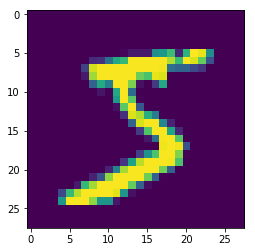

In [4]:
#Printing the shape of Training data set
#From this print statement, there are 60,000 images in X train of size 28X28.
#Correspoindingly, y_train is a column matrics of size 60000

print (X_train.shape)


# Using plt.imshow method from matplot library, the first image is printed. y[0] will be have a value of 5.
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
#Convert the images in training dataset and test set into multidimentional arrays of their pixel intensity values.

X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
#Convert the pixel intensity values into floating point value and normalize the pixel intensities by dividing with 255. Max value of pixel intensity is 255.

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices

y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices

# This will convert the numbers in the Y_train and y_test into column metrics of size 10. Element corresponding to the number will have value 1 and all other elements will be 0.
# For example, 5 will be represented by the column matrics [0,0,0,0,1,0,0,0,0,0]


Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [11]:
#Print first 10 elements in the Y_train after converting into catogorical matrices.

Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [18]:

from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1))) # 26,3

model.add(Convolution2D(32, 3, 3, activation='relu')) # 24,5
model.add(Convolution2D(64, 3, 3, activation='relu')) # 22,7

model.add(MaxPooling2D(pool_size=(2, 2))) # 11,14
model.add(Convolution2D(16, 1, 1, activation='relu')) # 11,14

model.add(Convolution2D(16, 3, 3, activation='relu')) # 9,16
model.add(Convolution2D(32, 3, 3, activation='relu')) # 7,18

model.add(Convolution2D(10, 1, activation='relu')) #7,18
model.add(Convolution2D(10, 7))#1,24
model.add(Flatten())
model.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (1, 1), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Con

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 16)        1040      
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 9, 9, 16)          2320      
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 7, 7, 32)          4640      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [21]:
# 60k images training images will be trained in batches of 32 images at a time. 
# One epoch consists of (60k/32 = 1875) forward propagations followed by one backward propagation
# Network will be trained for 10 epoches and after the training, model will have the weights.


model.fit(X_train, Y_train, batch_size=32, nb_epoch=50, verbose=1,validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 17s 290us/step - loss: 0.1761 - acc: 0.9462 - val_loss: 0.0625 - val_acc: 0.9809
Epoch 2/50
60000/60000 [==============================] - 12s 205us/step - loss: 0.0645 - acc: 0.9806 - val_loss: 0.0468 - val_acc: 0.9843
Epoch 3/50
60000/60000 [==============================] - 12s 204us/step - loss: 0.0461 - acc: 0.9856 - val_loss: 0.0346 - val_acc: 0.9885
Epoch 4/50
60000/60000 [==============================] - 12s 205us/step - loss: 0.0377 - acc: 0.9883 - val_loss: 0.0389 - val_acc: 0.9879
Epoch 5/50
60000/60000 [==============================] - 13s 213us/step - loss: 0.0314 - acc: 0.9899 - val_loss: 0.0427 - val_acc: 0.9870
Epoch 6/50
60000/60000 [==============================] - 12s 208us/step - loss: 0.0279 - acc: 0.9913 - val_loss: 0.0311 - val_acc: 0.9899
Epoch 7/50
60000/60000 [==============================] - 12s 203us/step - loss: 0.0238 - acc: 0.9925 - val_loss: 0.